# Stack Overflow - Data Exploration

This notebook explores the data of the GADS23 Kaggle Stack Overflow competition.

Your goal is to build a classifier that predicts whether or not a question will be closed given the question as submitted.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("/Users/ruben/Downloads/train.csv", index_col=0)
print data.shape

(140272, 15)


Over 140K posts, with 15 columns.

In [3]:
data.head(2)

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
0,6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,NaN,NaN,NaN,NaN,1
1,4873911,02/02/2011 11:30:10,465076,10/03/2010 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,jaxp,NaN,NaN,NaN,1


The data has the following features
- PostId - ID number of the question
- PostCreationDate - Date and time the question was asked
- OwnerUserId - ID number of the question asker
- OwnerCreationDate - Date and time the question asker's account was created
- ReputationAtPostCreation - Reputation of the question asker at the time the question was asked
- OwnerUndeletedAnswerCountAtPostTime - Number of answers (to other questions) that the question asker had written at the time the question was asked
- Title - Title of the question
- BodyMarkdown - Body of the question
- Tag1 through Tag5 - Topical tags applied to the question
- PostClosedDate - Date and time the question was closed (if it was closed; not in test set)
- OpenStatus - 1 indicates open, 0 indicates closed (**to be predicted in test set**)

In [4]:
n_samples = len(data)
for col in data:
    print "%-35s %7d values (%3d%%), of which %7d uniques" % \
        (col, data[col].count(), 100. * data[col].count() / n_samples, data[col].nunique())

PostId                               140272 values (100%), of which  140272 uniques
PostCreationDate                     140272 values (100%), of which  140118 uniques
OwnerUserId                          140272 values (100%), of which   94215 uniques
OwnerCreationDate                    140272 values (100%), of which   94149 uniques
ReputationAtPostCreation             140272 values (100%), of which    6423 uniques
OwnerUndeletedAnswerCountAtPostTime  140272 values (100%), of which     965 uniques
Title                                140272 values (100%), of which  140192 uniques
BodyMarkdown                         140272 values (100%), of which  140270 uniques
Tag1                                 140270 values ( 99%), of which    5210 uniques
Tag2                                 113044 values ( 80%), of which    9293 uniques
Tag3                                  75944 values ( 54%), of which   11081 uniques
Tag4                                  39663 values ( 28%), of which   10028 

- A few columns we could simply feed into our model as a continous feature (e.g., `ReputationAtPostCreation`)
- Not many columns we could simply feed as a categorical value (e.g., perhaps `OwnerUserId`)

What is the distribution of our target variable? 

In [5]:
data.OpenStatus.value_counts()

1    70136
0    70136
dtype: int64

A nice 50-50 distribution! 

### Datetime

The two columns with dates and times are in plain string format. It might be more useful to convert it to special `datetime` format, so we can easily access attributes like `year` or `month`, or sutract two dates to compute a duration.

In [6]:
%%time
data['PostCreationDate_dt'] = pd.to_datetime(data.PostCreationDate)

CPU times: user 11 s, sys: 57 ms, total: 11 s
Wall time: 11 s


Use the `.dt` operator to access special datetime functions.

In [7]:
data['PostCreationDate_year'] = data['PostCreationDate_dt'].dt.year

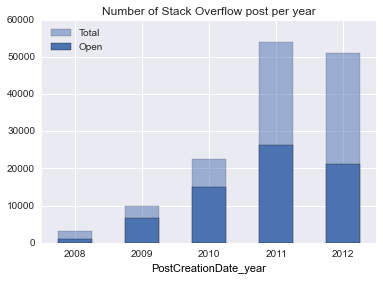

In [8]:
f = data.groupby('PostCreationDate_year').size().plot(kind='bar', rot=0, alpha=.5, label="Total")
f = data.groupby('PostCreationDate_year').OpenStatus.sum().plot(kind='bar', rot=0, label="Open")
f = plt.title("Number of Stack Overflow post per year"), plt.legend(loc="upper left")